# load ROOT file and convert to Awkward Array


| Library               | Purpose                                                                                                      |
| --------------------- | ------------------------------------------------------------------------------------------------------------ |
| **awkward (ak)**      | Core library for handling nested, variable-length array data structures typical in HEP event analysis.       |
| **pandas (pd)**       | Used mainly for tabular (flat) data manipulation — not the focus here but useful for summaries or debugging. |
| **numpy (np)**        | Numerical computations; Awkward interoperates seamlessly with NumPy for mathematical operations.             |
| **uproot**            | Reads ROOT files directly into Python (no C++). Converts TTrees and branches into Awkward arrays.            |
| **matplotlib.pyplot** | Used for visualization — plotting histograms of momentum components.                                         |


In [1]:
import awkward as ak
import pandas as pd
import numpy as np
import uproot
import matplotlib.pyplot as plt

- Open the ROOT file
- Access the event tree
- Extract only desired branches
- Assign to convenient variable names

In [3]:
# load ROOT file and convert to Awkward Array
data = uproot.open("../pythia8NCDIS_18x275_minQ2=10_beamEffects_xAngle=-0.025_hiDiv_5.2623.eicrecon.edm4eic.root")
data_tree = data.get('events;5')
momentum_arr = data_tree.arrays(['ReconstructedChargedParticles/ReconstructedChargedParticles.momentum.x','ReconstructedChargedParticles/ReconstructedChargedParticles.momentum.y','ReconstructedChargedParticles/ReconstructedChargedParticles.momentum.z'],library = "ak")
px = momentum_arr['ReconstructedChargedParticles/ReconstructedChargedParticles.momentum.x']
py = momentum_arr['ReconstructedChargedParticles/ReconstructedChargedParticles.momentum.y']
pz = momentum_arr['ReconstructedChargedParticles/ReconstructedChargedParticles.momentum.z']


### Creating a Physics Object Using Custom Awkward Behavior

- Defining a Custom Behavior
- Registering the Behavior
- Building the Structured Object

In [4]:
class Track_Momentum_Array(ak.Array):
    def p(self):
        return np.sqrt((self.px )**2 + (self.py )**2 + (self.pz )**2)

ak.behavior["*","chargetrack"] = Track_Momentum_Array
track = ak.zip({"px":px,"py":py,"pz":pz},with_name="chargetrack")

### Visualizing Track Momentum Components

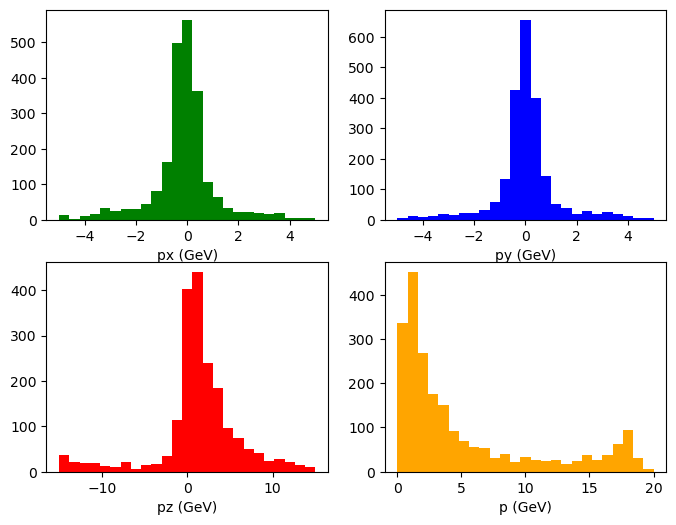

In [5]:
fig , ax = plt.subplots(2,2,figsize = (8,6))
ax[0,0].hist(ak.flatten(track.px) , bins = 25 ,range = (-5,5),color = "green")
ax[0,0].set_xlabel("px (GeV)")
ax[0,1].hist(ak.flatten(track.py) , bins = 25 ,range = (-5,5) ,color = "blue")
ax[0,1].set_xlabel("py (GeV)")
ax[1,0].hist(ak.flatten(track.pz) , bins = 25 ,range = (-15,15) ,color = "red")
ax[1,0].set_xlabel("pz (GeV)")
ax[1,1].hist(ak.flatten(track.p()) , bins = 25 ,range = (0,20) ,color = "orange")
ax[1,1].set_xlabel("p (GeV)")
plt.savefig("charged_particle_track_momentum.png")
plt.show()